<a href="https://colab.research.google.com/github/rocklouis055/Colab/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
from time import time
from tracemalloc import start,stop
from tracemalloc import get_traced_memory as memory
from random import sample
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
from itertools import zip_longest

#Setting limits and variables
sys.setrecursionlimit(1000000000)
reccount=0
concount=0
swpcount=0
AvgCount=3
TestSetCount=20
slowTestSetCount=15
slowAvgCount=1
MaxSetCount=100000
MinSetCount=5
TestSize= np.geomspace(MinSetCount,MaxSetCount,TestSetCount, endpoint = True,dtype=int)
slowTestSize=TestSize[:15]
Drop=[0,1,2,7,8,9,14,15,16]

In [ ]:
def beadSort(l):
    global reccount
    global concount
    global swpcount
    concount+=len(l)
    reccount+=1
    return list(map(sum, zip_longest(*[[1] * e for e in l], fillvalue=0)))

In [ ]:
def selectionSort(arr):
    global reccount
    global concount
    global swpcount
    reccount+=1
    n = len(arr)
    for i in range( n - 1 ): 
        concount+=1
        mi = i
        for j in range( i + 1, n ):
            concount+=1
            if arr[j] < arr[mi] :
                concount+=1
                mi = j
        if mi!= i :
            concount+=1
            temp = arr[i]
            arr[i] = arr[mi]
            arr[mi] = temp
            swpcount+=1
    return arr

In [ ]:
def bubbleSort(arr):
    global reccount
    global concount
    global swpcount
    reccount+=1
    is_sorted = True
    end = len(arr)
    while is_sorted:
        concount+=1
        is_sorted = False
        for i in range(1, end):
            concount+=1
            if arr[i] < arr[i-1]:
                concount+=1
                arr[i], arr[i-1] = arr[i-1], arr[i]
                swpcount+=1
                is_sorted = True
        end -= 1
    return arr

In [ ]:
def shellSort(l:list):
    global reccount
    global concount
    global swpcount
    reccount+=1
    arr = l[::]
    n = 0
    while (n < len(arr) // 3):
        n = n * 3 + 1
        concount+=1
    while (n > 0):
        concount+=1
        for i in range(int(n), len(arr)):
            concount+=1
            tmp = arr[i]
            j = i
            while j >= n and arr[j - n] > tmp:
                concount+=1
                arr[j] = arr[j-n]
                j -= n
                arr[j] = tmp
                swpcount+=1
        n = (n - 1) // 3
    return arr

In [ ]:
def quickSort(arr):
    global reccount
    global concount
    reccount+=1
    p=int(len(arr)/2)
    
    concount+=len(arr)*2-2

    if len(arr) <= 1:
        return arr
    l = [x for x in arr[1:] if x <= arr[p]]
    r = [x for x in arr[1:] if x > arr[p]]
    return quickSort(l) + arr[0:1] + quickSort(r)

In [ ]:
def countSort(iarr):
    global reccount
    global concount
    global swpcount
    reccount+=1
    l = max(iarr)+1
    countArray = [0] * l
    for el in iarr: 
        concount+=1
        countArray[el] += 1
    for i in range(1, l):
        concount+=1
        countArray[i] += countArray[i-1] 
    arr = [0]*len(iarr)
    i = len(iarr) - 1
    while i >= 0:
        concount+=1
        currentEl = iarr[i]
        countArray[currentEl] -= 1
        newPosition = countArray[currentEl]
        arr[newPosition] = currentEl
        i -= 1

    return arr

In [ ]:
def heapify(arr, n, i):
    global reccount
    global concount
    global swpcount
    reccount+=1
    largest = i 
    l = 2 * i + 1
    r = 2 * i + 2 
    if l < n and arr[i] < arr[l]:
        concount+=1
        largest = l
    if r < n and arr[largest] < arr[r]:
        concount+=1
        largest = r
    if largest != i:
        arr[i],arr[largest] = arr[largest],arr[i] 
        swpcount+=1
        heapify(arr, n, largest)

def heapSort(arr):
    global reccount
    global concount
    global swpcount
    reccount+=1
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        concount+=1
        heapify(arr, n, i)
    for i in range(n-1, 0, -1):
        concount+=1
        arr[i], arr[0] = arr[0], arr[i]   
        swpcount+=1
        heapify(arr, i, 0)
    return(arr)

In [ ]:
def get_digit(num, i):
    return (num // 10**i) % 10

def max_digits(arr):
    return len(str(max(arr)))

def radixSort(l:list):
    arr = l[::]
    max_len = max_digits(arr)
    global reccount
    global concount
    reccount+=1
    for i in range(max_len):
        concount+=1
        res = [[] for x in range(10)]
        for k in arr:
            concount+=1
            digit = get_digit(k, i)
            reccount+=1
            res[digit].append(k)

        arr = [y for x in res for y in x]
        concount+=len(arr)
    return arr

In [ ]:
def mergeSort(array):
    global reccount
    global concount
    global swpcount
    reccount+=1
    if len(array) > 1:
        concount+=1
        r = len(array)//2
        L = array[:r]
        M = array[r:]
        mergeSort(L)
        mergeSort(M)
        i = j = k = 0
        while i < len(L) and j < len(M):
            concount+=1
            if L[i] < M[j]:

                array[k] = L[i]
                i += 1
            else:
                array[k] = M[j]
                j += 1
            k += 1
            concount+=2
        while i < len(L):
            concount+=1
            array[k] = L[i]
            i += 1
            k += 1
        while j < len(M):
            concount+=1
            array[k] = M[j]
            j += 1
            k += 1
        return(array)

In [ ]:
def insertionSort(arr):
    global reccount
    global concount
    global swpcount
    reccount+=1
    for i in range(1, len(arr)):
        concount+=1
        key = arr[i]
        j = i-1
        while j >=0 and key < arr[j] :
                concount+=1
                arr[j+1] = arr[j]
                j -= 1
        arr[j+1] = key
    return(arr)

In [ ]:
minrun=128
def InsSort(arr,start,end):    
    global reccount
    global concount
    global swpcount
    reccount+=1
    for i in range(start+1,end+1):
        elem = arr[i]
        j = i-1
        while j>=start and elem<arr[j]:
            concount+=1
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = elem
    return arr

def merge2(arr,start,mid,end):
    global reccount
    global concount
    global swpcount
    reccount+=1
    if mid==end:
        concount+=1
        return arr
    first = arr[start:mid+1]
    last = arr[mid+1:end+1]
    len1 = mid-start+1
    len2 = end-mid
    ind1 = 0
    ind2 = 0
    ind  = start
     
    while ind1<len1 and ind2<len2:

        if first[ind1]<last[ind2]:
            arr[ind] = first[ind1]
            ind1 += 1
        else:
            arr[ind] = last[ind2]
            ind2 += 1
        ind += 1
        concount+=2
    while ind1<len1:
        concount+=1
        arr[ind] = first[ind1]
        ind1 += 1
        ind += 1
    while ind2<len2:
        concount+=1
        arr[ind] = last[ind2]
        ind2 += 1
        ind += 1   
    return arr

def timSort(arr):
    global reccount
    global concount
    global swpcount
    reccount+=1
    n = len(arr)
    for start in range(0,n,minrun):
        concount+=1
        end = min(start+minrun-1,n-1)
        arr = InsSort(arr,start,end)
    curr_size = minrun
    while curr_size<n:   
        concount+=1 
        for start in range(0,n,curr_size*2):
            concount+=1
            mid = min(n-1,start+curr_size-1)
            end = min(n-1,mid+curr_size)
            arr = merge2(arr,start,mid,end)
        curr_size *= 2
    return arr

In [ ]:
RandomSet={}
for i in TestSize:
  RandomSet[i]=sample(range(i),i)
RandomSet

In [ ]:
temp=[]
for i in TestSize:
  SampleSet=RandomSet[i]
  for j in range(AvgCount):
    start=time()
    (SampleSet[:]).sort()
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
countrandom={'Sort Algorithm Name':['Python Sort']*7,'Test':['Random']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
countrandomdata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
PythonSort=pd.DataFrame({**countrandom,**countrandomdata})
temp=[]
for i in range(TestSetCount):
  SampleSet=[c for c in range(TestSize[i],-1,-1)]
  for j in range(AvgCount):
    start=time()
    (SampleSet[:]).sort()
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
countrevsorted={'Sort Algorithm Name':['Python Sort']*7,'Test':['Reverse Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
countrevsorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
PythonSort=pd.concat([PythonSort,pd.DataFrame({**countrevsorted,**countrevsorteddata})])
temp=[]
for i in range(TestSetCount):
  SampleSet=[c for c in range(TestSize[i])]
  for j in range(AvgCount):
    start=time()
    (SampleSet[:]).sort()
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
PythonSorted={'Sort Algorithm Name':['Python Sort']*7,'Test':['Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
PythonSorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
PythonSort=pd.concat([PythonSort,pd.DataFrame({**PythonSorted,**PythonSorteddata})])
PythonSort.reset_index(drop=True,inplace=True)

In [ ]:
ps=PythonSort.drop(Drop).drop('Test',axis=1).groupby(['Sort Algorithm Name','Test Type'],sort=False).sum().replace(0,np.nan)
PythonSort.groupby(['Sort Algorithm Name','Test','Test Type'],sort=False).sum().replace(0,np.nan)

5       ...    100000
Sort Algorithm Name Test           Test Type                            ...          
Python Sort         Random         Test 1 Time(in sec)    2.145767e-06  ...  0.020751
                                   Test 2 Time(in sec)    7.152557e-07  ...  0.019013
                                   Test 3 Time(in sec)    4.768372e-07  ...  0.019883
                                   Average Time (in sec)  1.112620e-06  ...  0.019882
                                   Swap Count                      NaN  ...       NaN
                                   Condition Check Count           NaN  ...       NaN
                                   Recusrion Count                 NaN  ...       NaN
                    Reverse Sorted Test 1 Time(in sec)    1.907349e-06  ...  0.001127
                                   Test 2 Time(in sec)    4.768372e-07  ...  0.001167
                                   Test 3 Time(in sec)    2.384186e-07  ...  0.001198
                                   Average Time (in sec)  8.742015e-07  ...  0.001164
                                   Swap Count                      NaN  ...       NaN
                                   Condition Check Count           NaN  ...       NaN
                                   Recusrion Count                 NaN  ...       NaN
                    Sorted         Test 1 Time(in sec)    2.622604e-06  ...  0.001110
                                   Test 2 Time(in sec)    2.384186e-07  ...  0.001044
                                   Test 3 Time(in sec)    2.384186e-07  ...  0.001061
                                   Average Time (in sec)  1.033147e-06  ...  0.001072
                                   Swap Count                      NaN  ...       NaN
                                   Condition Check Count           NaN  ...       NaN
                                   Recusrion Count                 NaN  ...       NaN

[21 rows x 20 columns]

In [ ]:
temp=[]
for i in TestSize:
  reccount=0
  concount=0
  swpcount=0
  SampleSet=RandomSet[i]
  for j in range(AvgCount):
    start=time()
    radixSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
radixrandom={'Sort Algorithm Name':['Radix Sort']*7,'Test':['Random']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
radixrandomdata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
RadixSort=pd.DataFrame({**radixrandom,**radixrandomdata})
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i],-1,-1)]
  for j in range(AvgCount):
    start=time()
    radixSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
radixrevsorted={'Sort Algorithm Name':['Radix Sort']*7,'Test':['Reverse Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
radixrevsorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
RadixSort=pd.concat([RadixSort,pd.DataFrame({**radixrevsorted,**radixrevsorteddata})])
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i])]
  for j in range(AvgCount):
    start=time()
    radixSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
radixsorted={'Sort Algorithm Name':['Radix Sort']*7,'Test':['Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
radixsorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
RadixSort=pd.concat([RadixSort,pd.DataFrame({**radixsorted,**radixsorteddata})])
RadixSort.reset_index(drop=True,inplace=True)

In [ ]:
rs=RadixSort.drop(Drop).drop('Test',axis=1).groupby(['Sort Algorithm Name','Test Type'],sort=False).sum()
RadixSort.groupby(['Sort Algorithm Name','Test','Test Type'],sort=False).sum()

5       ...        100000
Sort Algorithm Name Test           Test Type                         ...              
Radix Sort          Random         Test 1 Time(in sec)     0.000014  ...  3.881607e-01
                                   Test 2 Time(in sec)     0.000007  ...  3.709779e-01
                                   Test 3 Time(in sec)     0.000005  ...  3.483045e-01
                                   Average Time (in sec)   0.000009  ...  3.691477e-01
                                   Swap Count              0.000000  ...  0.000000e+00
                                   Condition Check Count  11.000000  ...  1.000005e+06
                                   Recusrion Count         6.000000  ...  5.000010e+05
                    Reverse Sorted Test 1 Time(in sec)     0.000014  ...  4.197009e-01
                                   Test 2 Time(in sec)     0.000007  ...  7.515328e-01
                                   Test 3 Time(in sec)     0.000006  ...  8.070185e-01
                                   Average Time (in sec)   0.000009  ...  6.594174e-01
                                   Swap Count              0.000000  ...  0.000000e+00
                                   Condition Check Count  13.000000  ...  1.200018e+06
                                   Recusrion Count         7.000000  ...  6.000070e+05
                    Sorted         Test 1 Time(in sec)     0.000023  ...  6.526175e-01
                                   Test 2 Time(in sec)     0.000014  ...  7.249205e-01
                                   Test 3 Time(in sec)     0.000013  ...  7.175632e-01
                                   Average Time (in sec)   0.000016  ...  6.983670e-01
                                   Swap Count              0.000000  ...  0.000000e+00
                                   Condition Check Count  11.000000  ...  1.000005e+06
                                   Recusrion Count         6.000000  ...  5.000010e+05

[21 rows x 20 columns]

In [ ]:
temp=[]
for i in TestSize:
  reccount=0
  concount=0
  swpcount=0
  SampleSet=RandomSet[i]
  for j in range(AvgCount):
    start=time()
    quickSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
quickrandom={'Sort Algorithm Name':['Quick Sort']*7,'Test':['Random']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
quickrandomdata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(20)]))
QuickSort=pd.DataFrame({**quickrandom,**quickrandomdata})
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i],-1,-1)]
  for j in range(AvgCount):
    start=time()
    quickSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
quickrevsorted={'Sort Algorithm Name':['Quick Sort']*7,'Test':['Reverse Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
quickrevsorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
QuickSort=pd.concat([QuickSort,pd.DataFrame({**quickrevsorted,**quickrevsorteddata})])
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i])]
  for j in range(AvgCount):
    start=time()
    quickSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
QuickSorted={'Sort Algorithm Name':['Quick Sort']*7,'Test':['Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
QuickSorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
QuickSort=pd.concat([QuickSort,pd.DataFrame({**QuickSorted,**QuickSorteddata})])
QuickSort.reset_index(drop=True,inplace=True)

In [ ]:
qs=QuickSort.drop(Drop).drop('Test',axis=1).groupby(['Sort Algorithm Name','Test Type'],sort=False).sum()
QuickSort.groupby(['Sort Algorithm Name','Test','Test Type'],sort=False).sum()

5       ...        100000
Sort Algorithm Name Test           Test Type                         ...              
Quick Sort          Random         Test 1 Time(in sec)     0.000026  ...  5.295150e-01
                                   Test 2 Time(in sec)     0.000010  ...  5.895021e-01
                                   Test 3 Time(in sec)     0.000009  ...  5.690451e-01
                                   Average Time (in sec)   0.000015  ...  5.626874e-01
                                   Swap Count              0.000000  ...  0.000000e+00
                                   Condition Check Count  10.000000  ...  4.160124e+06
                                   Recusrion Count         7.000000  ...  1.341750e+05
                    Reverse Sorted Test 1 Time(in sec)     0.000017  ...  4.041467e-01
                                   Test 2 Time(in sec)     0.000022  ...  3.526695e-01
                                   Test 3 Time(in sec)     0.000010  ...  3.602307e-01
                                   Average Time (in sec)   0.000017  ...  3.723489e-01
                                   Swap Count              0.000000  ...  0.000000e+00
                                   Condition Check Count  12.000000  ...  2.894234e+06
                                   Recusrion Count         9.000000  ...  1.333350e+05
                    Sorted         Test 1 Time(in sec)     0.000015  ...  4.441454e-01
                                   Test 2 Time(in sec)     0.000008  ...  4.196501e-01
                                   Test 3 Time(in sec)     0.000008  ...  3.468747e-01
                                   Average Time (in sec)   0.000010  ...  4.035567e-01
                                   Swap Count              0.000000  ...  0.000000e+00
                                   Condition Check Count   8.000000  ...  2.875750e+06
                                   Recusrion Count         7.000000  ...  1.310710e+05

[21 rows x 20 columns]

In [ ]:
temp=[]
for i in TestSize:
  reccount=0
  concount=0
  swpcount=0
  SampleSet=RandomSet[i]
  for j in range(AvgCount):
    start=time()
    heapSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
heapandom={'Sort Algorithm Name':['Heap Sort']*7,'Test':['Random']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
heapandomdata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
HeapSort=pd.DataFrame({**heapandom,**heapandomdata})
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i],-1,-1)]
  for j in range(AvgCount):
    start=time()
    heapSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
heapevsorted={'Sort Algorithm Name':['Heap Sort']*7,'Test':['Reverse Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
heapevsorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
HeapSort=pd.concat([HeapSort,pd.DataFrame({**heapevsorted,**heapevsorteddata})])
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i])]
  for j in range(AvgCount):
    start=time()
    heapSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
HeapSorted={'Sort Algorithm Name':['Heap Sort']*7,'Test':['Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
HeapSorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
HeapSort=pd.concat([HeapSort,pd.DataFrame({**HeapSorted,**HeapSorteddata})])
HeapSort.reset_index(drop=True,inplace=True)

In [ ]:
hs=HeapSort.drop(Drop).drop('Test',axis=1).groupby(['Sort Algorithm Name','Test Type'],sort=False).sum()
HeapSort.groupby(['Sort Algorithm Name','Test','Test Type'],sort=False).sum()

5       ...        100000
Sort Algorithm Name Test           Test Type                         ...              
Heap Sort           Random         Test 1 Time(in sec)     0.000014  ...  1.475000e+00
                                   Test 2 Time(in sec)     0.000008  ...  1.487192e+00
                                   Test 3 Time(in sec)     0.000007  ...  1.522693e+00
                                   Average Time (in sec)   0.000010  ...  1.494962e+00
                                   Swap Count              9.000000  ...  1.574899e+06
                                   Condition Check Count  12.000000  ...  2.313276e+06
                                   Recusrion Count        12.000000  ...  1.624900e+06
                    Reverse Sorted Test 1 Time(in sec)     0.000015  ...  1.324248e+00
                                   Test 2 Time(in sec)     0.000023  ...  1.360136e+00
                                   Test 3 Time(in sec)     0.000009  ...  1.388448e+00
                                   Average Time (in sec)   0.000016  ...  1.357610e+00
                                   Swap Count              9.000000  ...  1.497536e+06
                                   Condition Check Count  13.000000  ...  2.177961e+06
                                   Recusrion Count        13.000000  ...  1.547537e+06
                    Sorted         Test 1 Time(in sec)     0.000014  ...  1.527357e+00
                                   Test 2 Time(in sec)     0.000009  ...  1.615182e+00
                                   Test 3 Time(in sec)     0.000008  ...  1.505306e+00
                                   Average Time (in sec)   0.000010  ...  1.549282e+00
                                   Swap Count             10.000000  ...  1.650854e+06
                                   Condition Check Count  14.000000  ...  2.453176e+06
                                   Recusrion Count        13.000000  ...  1.700855e+06

[21 rows x 20 columns]

In [ ]:
temp=[]
for i in TestSize:
  reccount=0
  concount=0
  swpcount=0
  SampleSet=RandomSet[i]
  for j in range(AvgCount):
    start=time()
    countSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
countrandom={'Sort Algorithm Name':['Count Sort']*7,'Test':['Random']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
countrandomdata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
CountSort=(pd.DataFrame({**countrandom,**countrandomdata}))
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i],-1,-1)]
  for j in range(AvgCount):
    start=time()
    countSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
countrevsorted={'Sort Algorithm Name':['Count Sort']*7,'Test':['Reverse Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
countrevsorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
CountSort=pd.concat([CountSort,pd.DataFrame({**countrevsorted,**countrevsorteddata})])
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i])]
  for j in range(AvgCount):
    start=time()
    countSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
CountSorted={'Sort Algorithm Name':['Count Sort']*7,'Test':['Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
CountSorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
CountSort=pd.concat([CountSort,pd.DataFrame({**CountSorted,**CountSorteddata})])
CountSort.reset_index(drop=True,inplace=True)

In [ ]:
cs=CountSort.drop(Drop).drop('Test',axis=1).groupby(['Sort Algorithm Name','Test Type'],sort=False).sum()
CountSort.groupby(['Sort Algorithm Name','Test','Test Type'],sort=False).sum()

5       ...         100000
Sort Algorithm Name Test           Test Type                         ...               
Count Sort          Random         Test 1 Time(in sec)     0.000011  ...       0.195535
                                   Test 2 Time(in sec)     0.000005  ...       0.105781
                                   Test 3 Time(in sec)     0.000005  ...       0.097383
                                   Average Time (in sec)   0.000007  ...       0.132900
                                   Swap Count              0.000000  ...       0.000000
                                   Condition Check Count  14.000000  ...  299999.000000
                                   Recusrion Count         1.000000  ...       1.000000
                    Reverse Sorted Test 1 Time(in sec)     0.000011  ...       0.075389
                                   Test 2 Time(in sec)     0.000006  ...       0.077185
                                   Test 3 Time(in sec)     0.000005  ...       0.080040
                                   Average Time (in sec)   0.000007  ...       0.077538
                                   Swap Count              0.000000  ...       0.000000
                                   Condition Check Count  17.000000  ...  300002.000000
                                   Recusrion Count         1.000000  ...       1.000000
                    Sorted         Test 1 Time(in sec)     0.000016  ...       0.068893
                                   Test 2 Time(in sec)     0.000010  ...       0.068922
                                   Test 3 Time(in sec)     0.000009  ...       0.074396
                                   Average Time (in sec)   0.000012  ...       0.070737
                                   Swap Count              0.000000  ...       0.000000
                                   Condition Check Count  14.000000  ...  299999.000000
                                   Recusrion Count         1.000000  ...       1.000000

[21 rows x 20 columns]

In [ ]:
temp=[]
for i in TestSize:
  reccount=0
  concount=0
  swpcount=0
  SampleSet=RandomSet[i]
  for j in range(AvgCount):
    start=time()
    shellSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
shellrandom={'Sort Algorithm Name':['Shell Sort']*7,'Test':['Random']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
shellrandomdata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
ShellSort=pd.DataFrame({**shellrandom,**shellrandomdata})
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i],-1,-1)]
  for j in range(AvgCount):
    start=time()
    shellSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
shellevsorted={'Sort Algorithm Name':['Shell Sort']*7,'Test':['Reverse Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
shellevsorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
ShellSort=pd.concat([ShellSort,pd.DataFrame({**shellevsorted,**shellevsorteddata})])
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i])]
  for j in range(AvgCount):
    start=time()
    shellSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
ShellSorted={'Sort Algorithm Name':['Shell Sort']*7,'Test':['Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
ShellSorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
ShellSort=pd.concat([ShellSort,pd.DataFrame({**ShellSorted,**ShellSorteddata})])
ShellSort.reset_index(drop=True,inplace=True)

In [ ]:
shs=ShellSort.drop(Drop).drop('Test',axis=1).groupby(['Sort Algorithm Name','Test Type'],sort=False).sum()
ShellSort.groupby(['Sort Algorithm Name','Test','Test Type'],sort=False).sum()

5       ...        100000
Sort Algorithm Name Test           Test Type                         ...              
Shell Sort          Random         Test 1 Time(in sec)     0.000010  ...  1.596591e+00
                                   Test 2 Time(in sec)     0.000005  ...  1.575613e+00
                                   Test 3 Time(in sec)     0.000004  ...  1.594056e+00
                                   Average Time (in sec)   0.000007  ...  1.588753e+00
                                   Swap Count              5.000000  ...  2.881011e+06
                                   Condition Check Count  11.000000  ...  3.848179e+06
                                   Recusrion Count         1.000000  ...  1.000000e+00
                    Reverse Sorted Test 1 Time(in sec)     0.000011  ...  5.200934e-01
                                   Test 2 Time(in sec)     0.000007  ...  5.151877e-01
                                   Test 3 Time(in sec)     0.000006  ...  5.179789e-01
                                   Average Time (in sec)   0.000008  ...  5.177534e-01
                                   Swap Count              5.000000  ...  6.011320e+05
                                   Condition Check Count  16.000000  ...  1.568311e+06
                                   Recusrion Count         1.000000  ...  1.000000e+00
                    Sorted         Test 1 Time(in sec)     0.000006  ...  2.637680e-01
                                   Test 2 Time(in sec)     0.000003  ...  2.538383e-01
                                   Test 3 Time(in sec)     0.000002  ...  2.458951e-01
                                   Average Time (in sec)   0.000004  ...  2.545005e-01
                                   Swap Count              0.000000  ...  0.000000e+00
                                   Condition Check Count   6.000000  ...  9.671680e+05
                                   Recusrion Count         1.000000  ...  1.000000e+00

[21 rows x 20 columns]

In [ ]:
temp=[]
for i in TestSize:
  reccount=0
  concount=0
  swpcount=0
  SampleSet=RandomSet[i]
  for j in range(AvgCount):
    start=time()
    timSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
timrandom={'Sort Algorithm Name':['Tim Sort']*7,'Test':['Random']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
timrandomdata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
TimSort=pd.DataFrame({**timrandom,**timrandomdata})
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i],-1,-1)]
  for j in range(AvgCount):
    start=time()
    timSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
timrevsorted={'Sort Algorithm Name':['Tim Sort']*7,'Test':['Reverse Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
timrevsorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
TimSort=pd.concat([TimSort,pd.DataFrame({**timrevsorted,**timrevsorteddata})])
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i])]
  for j in range(AvgCount):
    start=time()
    timSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
TimSorted={'Sort Algorithm Name':['Tim Sort']*7,'Test':['Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
TimSorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
TimSort=pd.concat([TimSort,pd.DataFrame({**TimSorted,**TimSorteddata})])
TimSort.reset_index(drop=True,inplace=True)

In [ ]:
ts=TimSort.drop(Drop).drop('Test',axis=1).groupby(['Sort Algorithm Name','Test Type'],sort=False).sum()
TimSort.groupby(['Sort Algorithm Name','Test','Test Type'],sort=False).sum()

5       ...        100000
Sort Algorithm Name Test           Test Type                         ...              
Tim Sort            Random         Test 1 Time(in sec)     0.000011  ...  1.258207e+00
                                   Test 2 Time(in sec)     0.000005  ...  1.305325e+00
                                   Test 3 Time(in sec)     0.000004  ...  1.283989e+00
                                   Average Time (in sec)   0.000007  ...  1.282507e+00
                                   Swap Count              0.000000  ...  0.000000e+00
                                   Condition Check Count   6.000000  ...  5.150975e+06
                                   Recusrion Count         2.000000  ...  1.569000e+03
                    Reverse Sorted Test 1 Time(in sec)     0.000013  ...  2.004204e+00
                                   Test 2 Time(in sec)     0.000007  ...  2.091398e+00
                                   Test 3 Time(in sec)     0.000006  ...  2.016392e+00
                                   Average Time (in sec)   0.000009  ...  2.037331e+00
                                   Swap Count              0.000000  ...  0.000000e+00
                                   Condition Check Count  16.000000  ...  7.808201e+06
                                   Recusrion Count         2.000000  ...  1.569000e+03
                    Sorted         Test 1 Time(in sec)     0.000009  ...  3.329740e-01
                                   Test 2 Time(in sec)     0.000003  ...  3.316112e-01
                                   Test 3 Time(in sec)     0.000003  ...  3.300362e-01
                                   Average Time (in sec)   0.000005  ...  3.315404e-01
                                   Swap Count              0.000000  ...  0.000000e+00
                                   Condition Check Count   1.000000  ...  1.522639e+06
                                   Recusrion Count         2.000000  ...  1.569000e+03

[21 rows x 20 columns]

In [ ]:
temp=[]
for i in TestSize:
  reccount=0
  concount=0
  swpcount=0
  SampleSet=RandomSet[i]
  for j in range(AvgCount):
    start=time()
    mergeSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
mergerandom={'Sort Algorithm Name':['Merge Sort']*7,'Test':['Random']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
mergerandomdata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
MergeSort=pd.DataFrame({**mergerandom,**mergerandomdata})
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i],-1,-1)]
  for j in range(AvgCount):
    start=time()
    mergeSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
mergerevsorted={'Sort Algorithm Name':['Merge Sort']*7,'Test':['Reverse Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
mergerevsorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
MergeSort=pd.concat([MergeSort,pd.DataFrame({**mergerevsorted,**mergerevsorteddata})])
temp=[]
for i in range(TestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(TestSize[i])]
  for j in range(AvgCount):
    start=time()
    mergeSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
MergeSorted={'Sort Algorithm Name':['Merge Sort']*7,'Test':['Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
MergeSorteddata=dict(zip(TestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(TestSetCount)]))
MergeSort=pd.concat([MergeSort,pd.DataFrame({**MergeSorted,**MergeSorteddata})])
MergeSort.reset_index(drop=True,inplace=True)

In [ ]:
ms=MergeSort.drop(Drop).drop('Test',axis=1).groupby(['Sort Algorithm Name','Test Type'],sort=False).sum()
MergeSort.groupby(['Sort Algorithm Name','Test','Test Type'],sort=False).sum()

5       ...        100000
Sort Algorithm Name Test           Test Type                         ...              
Merge Sort          Random         Test 1 Time(in sec)     0.000014  ...  1.049166e+00
                                   Test 2 Time(in sec)     0.000009  ...  1.030751e+00
                                   Test 3 Time(in sec)     0.000008  ...  1.112645e+00
                                   Average Time (in sec)   0.000010  ...  1.064187e+00
                                   Swap Count              0.000000  ...  0.000000e+00
                                   Condition Check Count  32.000000  ...  4.841717e+06
                                   Recusrion Count         9.000000  ...  1.999990e+05
                    Reverse Sorted Test 1 Time(in sec)     0.000018  ...  7.847054e-01
                                   Test 2 Time(in sec)     0.000013  ...  8.279703e-01
                                   Test 3 Time(in sec)     0.000012  ...  7.927654e-01
                                   Average Time (in sec)   0.000014  ...  8.018137e-01
                                   Swap Count              0.000000  ...  0.000000e+00
                                   Condition Check Count  39.000000  ...  3.476778e+06
                                   Recusrion Count        11.000000  ...  2.000010e+05
                    Sorted         Test 1 Time(in sec)     0.000015  ...  7.909400e-01
                                   Test 2 Time(in sec)     0.000009  ...  8.350551e-01
                                   Test 3 Time(in sec)     0.000009  ...  7.647069e-01
                                   Average Time (in sec)   0.000011  ...  7.969007e-01
                                   Swap Count              0.000000  ...  0.000000e+00
                                   Condition Check Count  26.000000  ...  3.398975e+06
                                   Recusrion Count         9.000000  ...  1.999990e+05

[21 rows x 20 columns]

In [ ]:
temp=[]
for i in slowTestSize:
  reccount=0
  concount=0
  swpcount=0
  SampleSet=RandomSet[i]
  for j in range(AvgCount):
    start=time()
    insertionSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
insertionrandom={'Sort Algorithm Name':['Insertion Sort']*7,'Test':['Random']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
insertionrandomdata=dict(zip(slowTestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(slowTestSetCount)]))
InsertionSort=pd.DataFrame({**insertionrandom,**insertionrandomdata})
temp=[]
for i in range(slowTestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(slowTestSize[i],-1,-1)]
  for j in range(AvgCount):
    start=time()
    insertionSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
insertionrevsorted={'Sort Algorithm Name':['Insertion Sort']*7,'Test':['Reverse Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
insertionrevsorteddata=dict(zip(slowTestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(slowTestSetCount)]))
InsertionSort=pd.concat([InsertionSort,pd.DataFrame({**insertionrevsorted,**insertionrevsorteddata})])
temp=[]
for i in range(slowTestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(slowTestSize[i])]
  for j in range(AvgCount):
    start=time()
    insertionSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
InsertionSorted={'Sort Algorithm Name':['Insertion Sort']*7,'Test':['Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
InsertionSorteddata=dict(zip(slowTestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(slowTestSetCount)]))
InsertionSort=pd.concat([InsertionSort,pd.DataFrame({**InsertionSorted,**InsertionSorteddata})])
InsertionSort.reset_index(drop=True,inplace=True)
for i in TestSize[15:]:
  InsertionSort[i]=[np.NaN]*21

In [ ]:
ins=InsertionSort.drop(Drop).drop('Test',axis=1).groupby(['Sort Algorithm Name','Test Type'],sort=False).sum().replace(0,np.nan)
for i in slowTestSize:
  ins[i]['Insertion Sort']['Swap Count']=0
InsertionSort.groupby(['Sort Algorithm Name','Test','Test Type'],sort=False).sum()

5       ...  100000
Sort Algorithm Name Test           Test Type                         ...        
Insertion Sort      Random         Test 1 Time(in sec)     0.000008  ...     0.0
                                   Test 2 Time(in sec)     0.000004  ...     0.0
                                   Test 3 Time(in sec)     0.000003  ...     0.0
                                   Average Time (in sec)   0.000005  ...     0.0
                                   Swap Count              0.000000  ...     0.0
                                   Condition Check Count   9.000000  ...     0.0
                                   Recusrion Count         1.000000  ...     0.0
                    Reverse Sorted Test 1 Time(in sec)     0.000009  ...     0.0
                                   Test 2 Time(in sec)     0.000005  ...     0.0
                                   Test 3 Time(in sec)     0.000005  ...     0.0
                                   Average Time (in sec)   0.000006  ...     0.0
                                   Swap Count              0.000000  ...     0.0
                                   Condition Check Count  20.000000  ...     0.0
                                   Recusrion Count         1.000000  ...     0.0
                    Sorted         Test 1 Time(in sec)     0.000005  ...     0.0
                                   Test 2 Time(in sec)     0.000002  ...     0.0
                                   Test 3 Time(in sec)     0.000001  ...     0.0
                                   Average Time (in sec)   0.000003  ...     0.0
                                   Swap Count              0.000000  ...     0.0
                                   Condition Check Count   4.000000  ...     0.0
                                   Recusrion Count         1.000000  ...     0.0

[21 rows x 20 columns]

In [ ]:
temp=[]
for i in slowTestSize:
  reccount=0
  concount=0
  swpcount=0
  SampleSet=RandomSet[i]
  for j in range(AvgCount):
    start=time()
    selectionSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
insertionrandom={'Sort Algorithm Name':['Selection Sort']*7,'Test':['Random']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
insertionrandomdata=dict(zip(slowTestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(slowTestSetCount)]))
SelectionSort=pd.DataFrame({**insertionrandom,**insertionrandomdata})
temp=[]
for i in range(slowTestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(slowTestSize[i],-1,-1)]
  for j in range(AvgCount):
    start=time()
    selectionSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
insertionrevsorted={'Sort Algorithm Name':['Selection Sort']*7,'Test':['Reverse Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
insertionrevsorteddata=dict(zip(slowTestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(slowTestSetCount)]))
SelectionSort=pd.concat([SelectionSort,pd.DataFrame({**insertionrevsorted,**insertionrevsorteddata})])
temp=[]
for i in range(slowTestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(slowTestSize[i])]
  for j in range(AvgCount):
    start=time()
    selectionSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
SelectionSorted={'Sort Algorithm Name':['Selection Sort']*7,'Test':['Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
SelectionSorteddata=dict(zip(slowTestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(slowTestSetCount)]))
SelectionSort=pd.concat([SelectionSort,pd.DataFrame({**SelectionSorted,**SelectionSorteddata})])
SelectionSort.reset_index(drop=True,inplace=True)
for i in TestSize[15:]:
  SelectionSort[i]=[np.NaN]*21

In [ ]:
ses=SelectionSort.drop(Drop).drop('Test',axis=1).groupby(['Sort Algorithm Name','Test Type'],sort=False).sum().replace(0,np.nan)
SelectionSort.groupby(['Sort Algorithm Name','Test','Test Type'],sort=False).sum().replace(0,np.nan)

5       ...  100000
Sort Algorithm Name Test           Test Type                         ...        
Selection Sort      Random         Test 1 Time(in sec)     0.000009  ...     NaN
                                   Test 2 Time(in sec)     0.000005  ...     NaN
                                   Test 3 Time(in sec)     0.000005  ...     NaN
                                   Average Time (in sec)   0.000006  ...     NaN
                                   Swap Count              3.000000  ...     NaN
                                   Condition Check Count  21.000000  ...     NaN
                                   Recusrion Count         1.000000  ...     NaN
                    Reverse Sorted Test 1 Time(in sec)     0.000009  ...     NaN
                                   Test 2 Time(in sec)     0.000006  ...     NaN
                                   Test 3 Time(in sec)     0.000006  ...     NaN
                                   Average Time (in sec)   0.000007  ...     NaN
                                   Swap Count              3.000000  ...     NaN
                                   Condition Check Count  32.000000  ...     NaN
                                   Recusrion Count         1.000000  ...     NaN
                    Sorted         Test 1 Time(in sec)     0.000007  ...     NaN
                                   Test 2 Time(in sec)     0.000004  ...     NaN
                                   Test 3 Time(in sec)     0.000004  ...     NaN
                                   Average Time (in sec)   0.000005  ...     NaN
                                   Swap Count                   NaN  ...     NaN
                                   Condition Check Count  14.000000  ...     NaN
                                   Recusrion Count         1.000000  ...     NaN

[21 rows x 20 columns]

In [ ]:
temp=[]
for i in slowTestSize:
  reccount=0
  concount=0
  swpcount=0
  SampleSet=RandomSet[i]
  for j in range(AvgCount):
    start=time()
    bubbleSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
insertionrandom={'Sort Algorithm Name':['Bubble Sort']*7,'Test':['Random']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
insertionrandomdata=dict(zip(slowTestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(slowTestSetCount)]))
BubbleSort=pd.DataFrame({**insertionrandom,**insertionrandomdata})
temp=[]
for i in range(slowTestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(slowTestSize[i],-1,-1)]
  for j in range(AvgCount):
    start=time()
    bubbleSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
insertionrevsorted={'Sort Algorithm Name':['Bubble Sort']*7,'Test':['Reverse Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
insertionrevsorteddata=dict(zip(slowTestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(slowTestSetCount)]))
BubbleSort=pd.concat([BubbleSort,pd.DataFrame({**insertionrevsorted,**insertionrevsorteddata})])
temp=[]
for i in range(slowTestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(slowTestSize[i])]
  for j in range(AvgCount):
    start=time()
    bubbleSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
BubbleSorted={'Sort Algorithm Name':['Bubble Sort']*7,'Test':['Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
BubbleSorteddata=dict(zip(slowTestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(slowTestSetCount)]))
BubbleSort=pd.concat([BubbleSort,pd.DataFrame({**BubbleSorted,**BubbleSorteddata})])
BubbleSort.reset_index(drop=True,inplace=True)
for i in TestSize[15:]:
  BubbleSort[i]=[np.NaN]*21

In [ ]:
bs=BubbleSort.drop(Drop).drop('Test',axis=1).groupby(['Sort Algorithm Name','Test Type'],sort=False).sum().replace(0,np.nan)
BubbleSort.groupby(['Sort Algorithm Name','Test','Test Type'],sort=False).sum().replace(0,np.nan)

5       ...  100000
Sort Algorithm Name Test           Test Type                         ...        
Bubble Sort         Random         Test 1 Time(in sec)     0.000008  ...     NaN
                                   Test 2 Time(in sec)     0.000005  ...     NaN
                                   Test 3 Time(in sec)     0.000005  ...     NaN
                                   Average Time (in sec)   0.000006  ...     NaN
                                   Swap Count              5.000000  ...     NaN
                                   Condition Check Count  19.000000  ...     NaN
                                   Recusrion Count         1.000000  ...     NaN
                    Reverse Sorted Test 1 Time(in sec)     0.000022  ...     NaN
                                   Test 2 Time(in sec)     0.000019  ...     NaN
                                   Test 3 Time(in sec)     0.000018  ...     NaN
                                   Average Time (in sec)   0.000020  ...     NaN
                                   Swap Count             15.000000  ...     NaN
                                   Condition Check Count  36.000000  ...     NaN
                                   Recusrion Count         1.000000  ...     NaN
                    Sorted         Test 1 Time(in sec)     0.000005  ...     NaN
                                   Test 2 Time(in sec)     0.000002  ...     NaN
                                   Test 3 Time(in sec)     0.000001  ...     NaN
                                   Average Time (in sec)   0.000002  ...     NaN
                                   Swap Count                   NaN  ...     NaN
                                   Condition Check Count   5.000000  ...     NaN
                                   Recusrion Count         1.000000  ...     NaN

[21 rows x 20 columns]

In [ ]:
temp=[]
for i in slowTestSize:
  reccount=0
  concount=0
  swpcount=0
  SampleSet=RandomSet[i]
  for j in range(AvgCount):
    start=time()
    beadSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
insertionrandom={'Sort Algorithm Name':['Bead Sort']*7,'Test':['Random']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
insertionrandomdata=dict(zip(slowTestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(slowTestSetCount)]))
BeadSort=pd.DataFrame({**insertionrandom,**insertionrandomdata})
temp=[]
for i in range(slowTestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(slowTestSize[i],-1,-1)]
  for j in range(AvgCount):
    start=time()
    beadSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
insertionrevsorted={'Sort Algorithm Name':['Bead Sort']*7,'Test':['Reverse Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
insertionrevsorteddata=dict(zip(slowTestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(slowTestSetCount)]))
BeadSort=pd.concat([BeadSort,pd.DataFrame({**insertionrevsorted,**insertionrevsorteddata})])
temp=[]
for i in range(slowTestSetCount):
  reccount=0
  concount=0
  swpcount=0
  SampleSet=[c for c in range(slowTestSize[i])]
  for j in range(AvgCount):
    start=time()
    beadSort(SampleSet[:])
    end=time()-start
    temp.extend([end])
  temp.extend([(temp[-1]+temp[-2]+temp[-3])/3,swpcount/3,concount/3,reccount/3])
BeadSorted={'Sort Algorithm Name':['Bead Sort']*7,'Test':['Sorted']*7,'Test Type':['Test 1 Time(in sec)','Test 2 Time(in sec)','Test 3 Time(in sec)','Average Time (in sec)','Swap Count','Condition Check Count','Recusrion Count']}
BeadSorteddata=dict(zip(slowTestSize,[[temp[k] for k in range(i*7,i*7+7)] for i in range(slowTestSetCount)]))
BeadSort=pd.concat([BeadSort,pd.DataFrame({**BeadSorted,**BeadSorteddata})])
BeadSort.reset_index(drop=True,inplace=True)
for i in TestSize[15:]:
  BeadSort[i]=[np.NaN]*21

In [ ]:
bes=BeadSort.drop(Drop).drop('Test',axis=1).groupby(['Sort Algorithm Name','Test Type'],sort=False).sum().replace(0,np.nan)
for i in slowTestSize:
  bes[i]['Bead Sort']['Swap Count']=0
BeadSort.groupby(['Sort Algorithm Name','Test','Test Type'],sort=False).sum().replace(0,np.nan)

5       ...  100000
Sort Algorithm Name Test           Test Type                        ...        
Bead Sort           Random         Test 1 Time(in sec)    0.000015  ...     NaN
                                   Test 2 Time(in sec)    0.000004  ...     NaN
                                   Test 3 Time(in sec)    0.000003  ...     NaN
                                   Average Time (in sec)  0.000007  ...     NaN
                                   Swap Count                  NaN  ...     NaN
                                   Condition Check Count  5.000000  ...     NaN
                                   Recusrion Count        1.000000  ...     NaN
                    Reverse Sorted Test 1 Time(in sec)    0.000030  ...     NaN
                                   Test 2 Time(in sec)    0.000006  ...     NaN
                                   Test 3 Time(in sec)    0.000004  ...     NaN
                                   Average Time (in sec)  0.000013  ...     NaN
                                   Swap Count                  NaN  ...     NaN
                                   Condition Check Count  6.000000  ...     NaN
                                   Recusrion Count        1.000000  ...     NaN
                    Sorted         Test 1 Time(in sec)    0.000010  ...     NaN
                                   Test 2 Time(in sec)    0.000004  ...     NaN
                                   Test 3 Time(in sec)    0.000004  ...     NaN
                                   Average Time (in sec)  0.000006  ...     NaN
                                   Swap Count                  NaN  ...     NaN
                                   Condition Check Count  5.000000  ...     NaN
                                   Recusrion Count        1.000000  ...     NaN

[21 rows x 20 columns]

In [ ]:
CombinedData=pd.concat([ps,ts,rs,cs,hs,qs,ms,ins,ses,shs,bs,bes])
CombinedData

5       ...        100000
Sort Algorithm Name Test Type                         ...              
Python Sort         Average Time (in sec)   0.000003  ...  2.211825e-02
                    Swap Count                   NaN  ...           NaN
                    Condition Check Count        NaN  ...           NaN
                    Recusrion Count              NaN  ...           NaN
Tim Sort            Average Time (in sec)   0.000021  ...  3.651379e+00
                    Swap Count              0.000000  ...  0.000000e+00
                    Condition Check Count  23.000000  ...  1.448182e+07
                    Recusrion Count         6.000000  ...  4.707000e+03
Radix Sort          Average Time (in sec)   0.000034  ...  1.726932e+00
                    Swap Count              0.000000  ...  0.000000e+00
                    Condition Check Count  35.000000  ...  3.200028e+06
                    Recusrion Count        19.000000  ...  1.600009e+06
Count Sort          Average Time (in sec)   0.000026  ...  2.811751e-01
                    Swap Count              0.000000  ...  0.000000e+00
                    Condition Check Count  45.000000  ...  9.000000e+05
                    Recusrion Count         3.000000  ...  3.000000e+00
Heap Sort           Average Time (in sec)   0.000036  ...  4.401854e+00
                    Swap Count             28.000000  ...  4.723289e+06
                    Condition Check Count  39.000000  ...  6.944413e+06
                    Recusrion Count        38.000000  ...  4.873292e+06
Quick Sort          Average Time (in sec)   0.000042  ...  1.338593e+00
                    Swap Count              0.000000  ...  0.000000e+00
                    Condition Check Count  30.000000  ...  9.930108e+06
                    Recusrion Count        23.000000  ...  3.985810e+05
Merge Sort          Average Time (in sec)   0.000036  ...  2.662902e+00
                    Swap Count              0.000000  ...  0.000000e+00
                    Condition Check Count  97.000000  ...  1.171747e+07
                    Recusrion Count        29.000000  ...  5.999990e+05
Insertion Sort      Average Time (in sec)   0.000014  ...           NaN
                    Swap Count              0.000000  ...           NaN
                    Condition Check Count  33.000000  ...           NaN
                    Recusrion Count         3.000000  ...           NaN
Selection Sort      Average Time (in sec)   0.000018  ...           NaN
                    Swap Count              6.000000  ...           NaN
                    Condition Check Count  67.000000  ...           NaN
                    Recusrion Count         3.000000  ...           NaN
Shell Sort          Average Time (in sec)   0.000018  ...  2.361007e+00
                    Swap Count             10.000000  ...  3.482143e+06
                    Condition Check Count  33.000000  ...  6.383658e+06
                    Recusrion Count         3.000000  ...  3.000000e+00
Bubble Sort         Average Time (in sec)   0.000028  ...           NaN
                    Swap Count             20.000000  ...           NaN
                    Condition Check Count  60.000000  ...           NaN
                    Recusrion Count         3.000000  ...           NaN
Bead Sort           Average Time (in sec)   0.000026  ...           NaN
                    Swap Count              0.000000  ...           NaN
                    Condition Check Count  16.000000  ...           NaN
                    Recusrion Count         3.000000  ...           NaN

[48 rows x 20 columns]

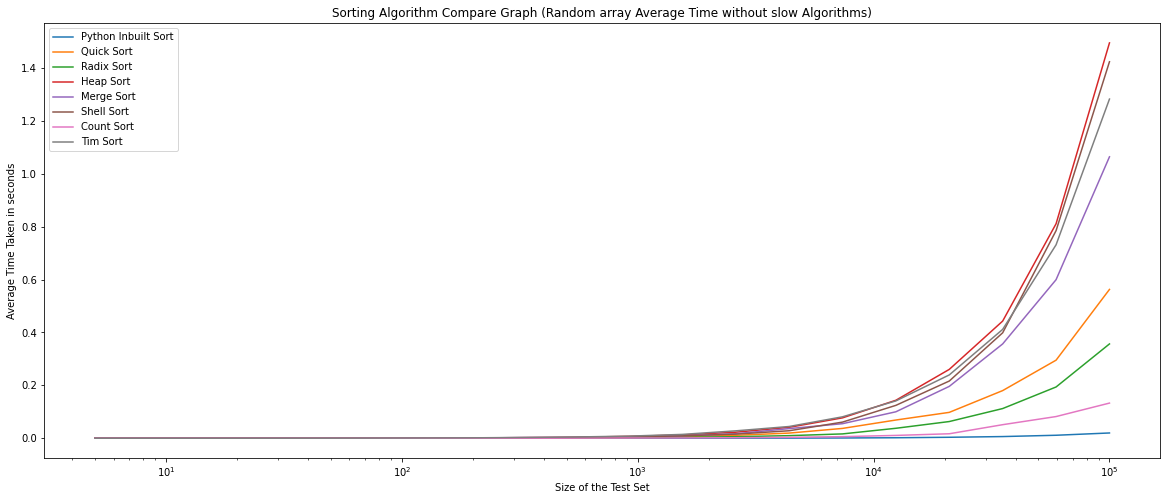

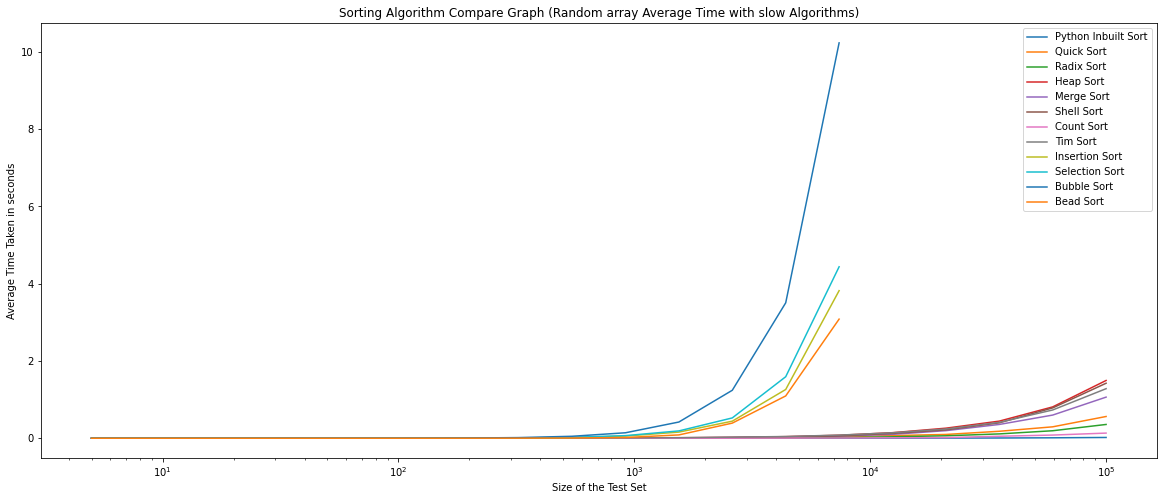

In [ ]:

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(TestSize,PythonSort.loc[3][3:],label="Python Inbuilt Sort")
plt.plot(TestSize,QuickSort.loc[3][3:],label="Quick Sort")
plt.plot(TestSize,RadixSort.loc[3][3:],label="Radix Sort")
plt.plot(TestSize,HeapSort.loc[3][3:],label="Heap Sort")
plt.plot(TestSize,MergeSort.loc[3][3:],label="Merge Sort")
plt.plot(TestSize,ShellSort.loc[3][3:],label="Shell Sort")
plt.plot(TestSize,CountSort.loc[3][3:],label="Count Sort")
plt.plot(TestSize,TimSort.loc[3][3:],label="Tim Sort")
plt.ylabel('Average Time Taken in seconds')
plt.xlabel('Size of the Test Set')
plt.xscale("log")
plt.title('Sorting Algorithm Compare Graph (Random array Average Time without slow Algorithms)')
plt.legend()
plt.show()
print()


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(TestSize,PythonSort.loc[3][3:],label="Python Inbuilt Sort")
plt.plot(TestSize,QuickSort.loc[3][3:],label="Quick Sort")
plt.plot(TestSize,RadixSort.loc[3][3:],label="Radix Sort")
plt.plot(TestSize,HeapSort.loc[3][3:],label="Heap Sort")
plt.plot(TestSize,MergeSort.loc[3][3:],label="Merge Sort")
plt.plot(TestSize,ShellSort.loc[3][3:],label="Shell Sort")
plt.plot(TestSize,CountSort.loc[3][3:],label="Count Sort")
plt.plot(TestSize,TimSort.loc[3][3:],label="Tim Sort")
plt.plot(TestSize,InsertionSort.loc[3][3:],label="Insertion Sort")
plt.plot(TestSize,SelectionSort.loc[3][3:],label="Selection Sort")
plt.plot(TestSize,BubbleSort.loc[3][3:],label="Bubble Sort")
plt.plot(TestSize,BeadSort.loc[3][3:],label="Bead Sort")
plt.ylabel('Average Time Taken in seconds')
plt.xlabel('Size of the Test Set')
plt.xscale("log")
plt.title('Sorting Algorithm Compare Graph (Random array Average Time with slow Algorithms)')
plt.legend()
plt.show()

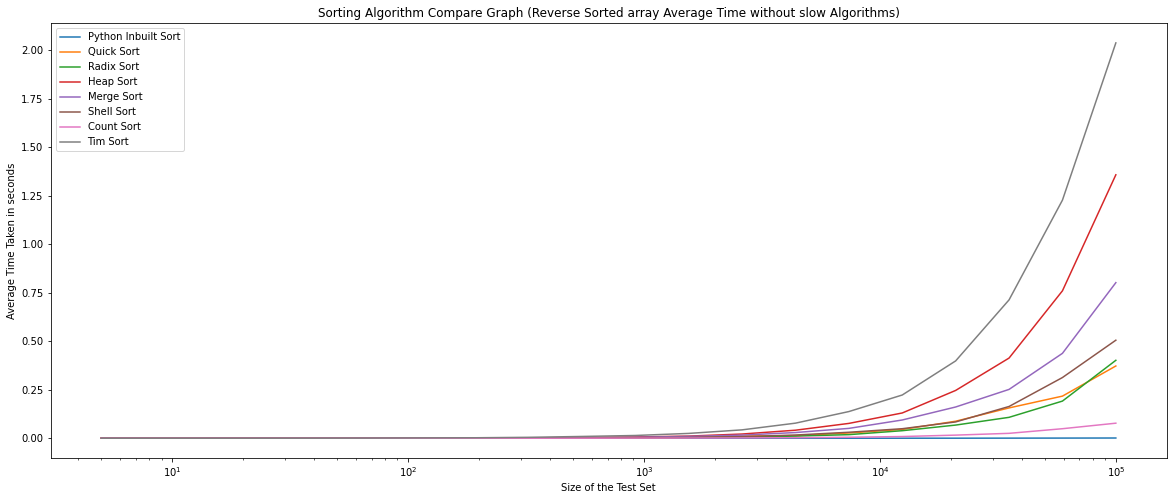

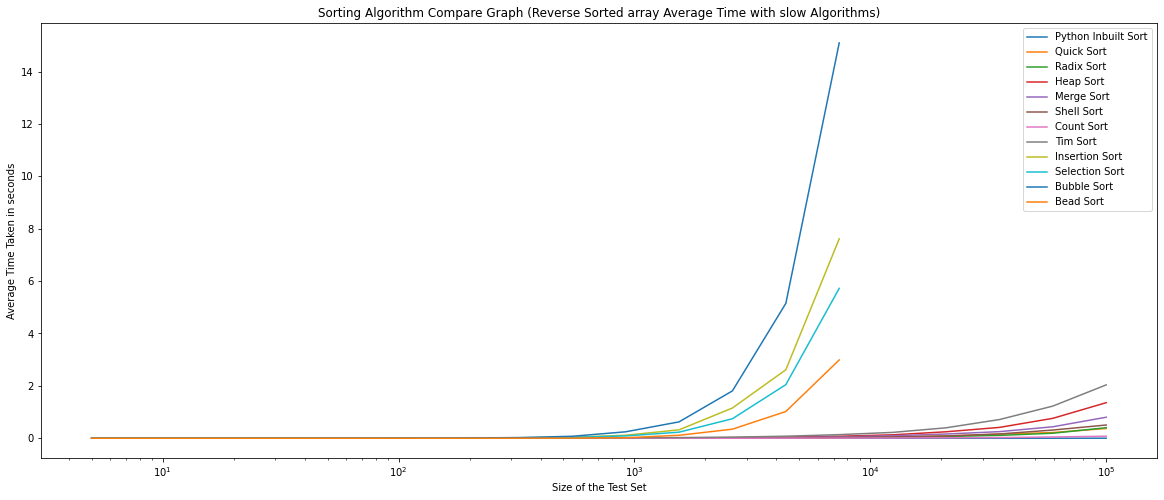

In [ ]:

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(TestSize,PythonSort.loc[10][3:],label="Python Inbuilt Sort")
plt.plot(TestSize,QuickSort.loc[10][3:],label="Quick Sort")
plt.plot(TestSize,RadixSort.loc[10][3:],label="Radix Sort")
plt.plot(TestSize,HeapSort.loc[10][3:],label="Heap Sort")
plt.plot(TestSize,MergeSort.loc[10][3:],label="Merge Sort")
plt.plot(TestSize,ShellSort.loc[10][3:],label="Shell Sort")
plt.plot(TestSize,CountSort.loc[10][3:],label="Count Sort")
plt.plot(TestSize,TimSort.loc[10][3:],label="Tim Sort")
plt.ylabel('Average Time Taken in seconds')
plt.xlabel('Size of the Test Set')
plt.xscale("log")
plt.title('Sorting Algorithm Compare Graph (Reverse Sorted array Average Time without slow Algorithms)')
plt.legend()
plt.show()
print()


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(TestSize,PythonSort.loc[10][3:],label="Python Inbuilt Sort")
plt.plot(TestSize,QuickSort.loc[10][3:],label="Quick Sort")
plt.plot(TestSize,RadixSort.loc[10][3:],label="Radix Sort")
plt.plot(TestSize,HeapSort.loc[10][3:],label="Heap Sort")
plt.plot(TestSize,MergeSort.loc[10][3:],label="Merge Sort")
plt.plot(TestSize,ShellSort.loc[10][3:],label="Shell Sort")
plt.plot(TestSize,CountSort.loc[10][3:],label="Count Sort")
plt.plot(TestSize,TimSort.loc[10][3:],label="Tim Sort")
plt.plot(TestSize,InsertionSort.loc[10][3:],label="Insertion Sort")
plt.plot(TestSize,SelectionSort.loc[10][3:],label="Selection Sort")
plt.plot(TestSize,BubbleSort.loc[10][3:],label="Bubble Sort")
plt.plot(TestSize,BeadSort.loc[10][3:],label="Bead Sort")
plt.ylabel('Average Time Taken in seconds')
plt.xlabel('Size of the Test Set')
plt.xscale("log")
plt.title('Sorting Algorithm Compare Graph (Reverse Sorted array Average Time with slow Algorithms)')
plt.legend()
plt.show()
print()

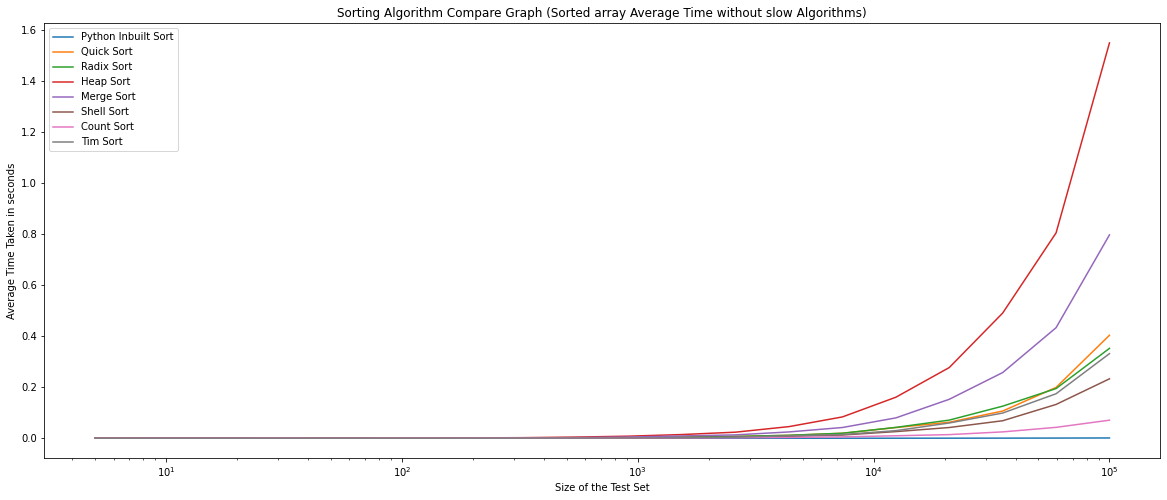

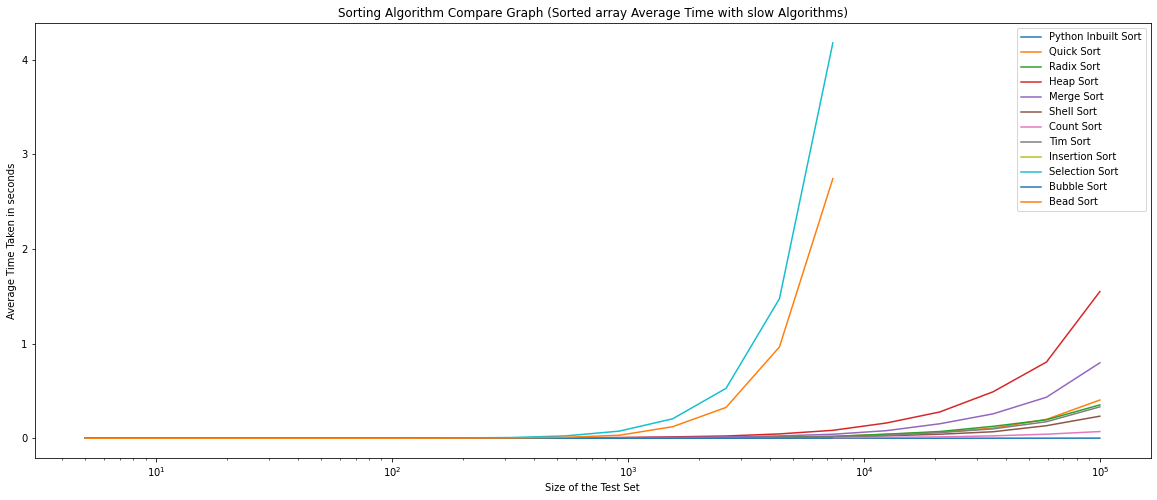

In [ ]:

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(TestSize,PythonSort.loc[17][3:],label="Python Inbuilt Sort")
plt.plot(TestSize,QuickSort.loc[17][3:],label="Quick Sort")
plt.plot(TestSize,RadixSort.loc[17][3:],label="Radix Sort")
plt.plot(TestSize,HeapSort.loc[17][3:],label="Heap Sort")
plt.plot(TestSize,MergeSort.loc[17][3:],label="Merge Sort")
plt.plot(TestSize,ShellSort.loc[17][3:],label="Shell Sort")
plt.plot(TestSize,CountSort.loc[17][3:],label="Count Sort")
plt.plot(TestSize,TimSort.loc[17][3:],label="Tim Sort")
plt.ylabel('Average Time Taken in seconds')
plt.xlabel('Size of the Test Set')
plt.xscale("log")
plt.title('Sorting Algorithm Compare Graph (Sorted array Average Time without slow Algorithms)')
plt.legend()
plt.show()
print()


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(TestSize,PythonSort.loc[17][3:],label="Python Inbuilt Sort")
plt.plot(TestSize,QuickSort.loc[17][3:],label="Quick Sort")
plt.plot(TestSize,RadixSort.loc[17][3:],label="Radix Sort")
plt.plot(TestSize,HeapSort.loc[17][3:],label="Heap Sort")
plt.plot(TestSize,MergeSort.loc[17][3:],label="Merge Sort")
plt.plot(TestSize,ShellSort.loc[17][3:],label="Shell Sort")
plt.plot(TestSize,CountSort.loc[17][3:],label="Count Sort")
plt.plot(TestSize,TimSort.loc[17][3:],label="Tim Sort")
plt.plot(TestSize,InsertionSort.loc[17][3:],label="Insertion Sort")
plt.plot(TestSize,SelectionSort.loc[17][3:],label="Selection Sort")
plt.plot(TestSize,BubbleSort.loc[17][3:],label="Bubble Sort")
plt.plot(TestSize,BeadSort.loc[17][3:],label="Bead Sort")
plt.ylabel('Average Time Taken in seconds')
plt.xlabel('Size of the Test Set')
plt.xscale("log")
plt.title('Sorting Algorithm Compare Graph (Sorted array Average Time with slow Algorithms)')
plt.legend()
plt.show()

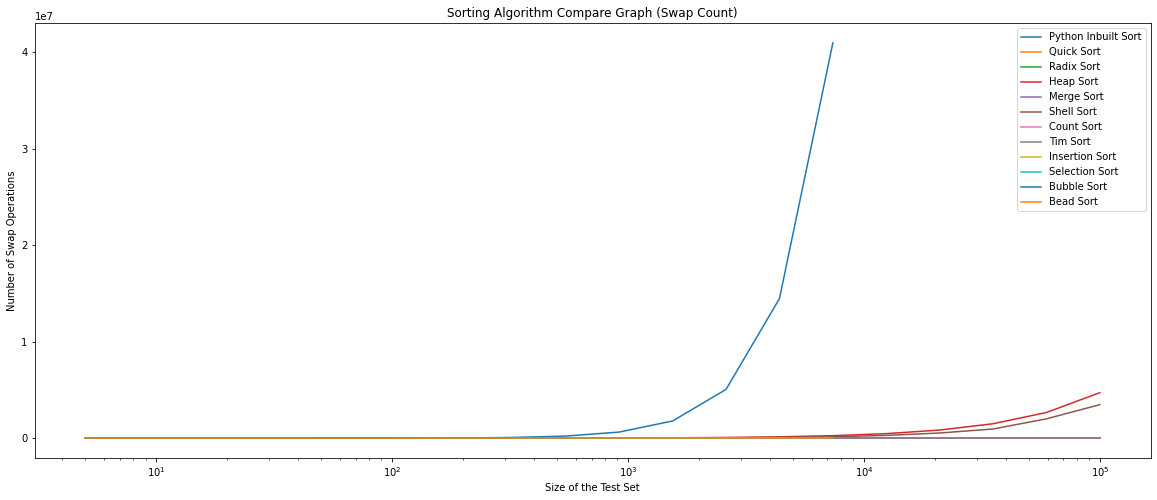

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(TestSize,CombinedData.loc['Python Sort'].loc['Swap Count'],label="Python Inbuilt Sort")
plt.plot(TestSize,CombinedData.loc['Quick Sort'].loc['Swap Count'],label="Quick Sort")
plt.plot(TestSize,CombinedData.loc['Radix Sort'].loc['Swap Count'],label="Radix Sort")
plt.plot(TestSize,CombinedData.loc['Heap Sort'].loc['Swap Count'],label="Heap Sort")
plt.plot(TestSize,CombinedData.loc['Merge Sort'].loc['Swap Count'],label="Merge Sort")
plt.plot(TestSize,CombinedData.loc['Shell Sort'].loc['Swap Count'],label="Shell Sort")
plt.plot(TestSize,CombinedData.loc['Count Sort'].loc['Swap Count'],label="Count Sort")
plt.plot(TestSize,CombinedData.loc['Tim Sort'].loc['Swap Count'],label="Tim Sort")
plt.plot(TestSize,CombinedData.loc['Insertion Sort'].loc['Swap Count'],label="Insertion Sort")
plt.plot(TestSize,CombinedData.loc['Selection Sort'].loc['Swap Count'],label="Selection Sort")
plt.plot(TestSize,CombinedData.loc['Bubble Sort'].loc['Swap Count'],label="Bubble Sort")
plt.plot(TestSize,CombinedData.loc['Bead Sort'].loc['Swap Count'],label="Bead Sort")
plt.ylabel('Number of Swap Operations')
plt.xlabel('Size of the Test Set')
plt.xscale("log")
plt.title('Sorting Algorithm Compare Graph (Swap Count)')
plt.legend()
plt.show()

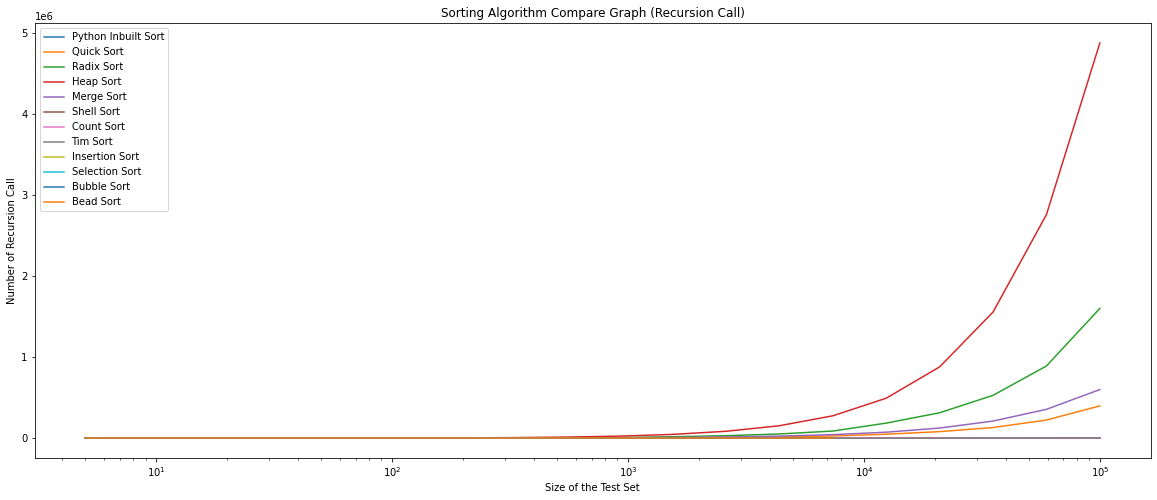

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(TestSize,CombinedData.loc['Python Sort'].loc['Recusrion Count'],label="Python Inbuilt Sort")
plt.plot(TestSize,CombinedData.loc['Quick Sort'].loc['Recusrion Count'],label="Quick Sort")
plt.plot(TestSize,CombinedData.loc['Radix Sort'].loc['Recusrion Count'],label="Radix Sort")
plt.plot(TestSize,CombinedData.loc['Heap Sort'].loc['Recusrion Count'],label="Heap Sort")
plt.plot(TestSize,CombinedData.loc['Merge Sort'].loc['Recusrion Count'],label="Merge Sort")
plt.plot(TestSize,CombinedData.loc['Shell Sort'].loc['Recusrion Count'],label="Shell Sort")
plt.plot(TestSize,CombinedData.loc['Count Sort'].loc['Recusrion Count'],label="Count Sort")
plt.plot(TestSize,CombinedData.loc['Tim Sort'].loc['Recusrion Count'],label="Tim Sort")
plt.plot(TestSize,CombinedData.loc['Insertion Sort'].loc['Recusrion Count'],label="Insertion Sort")
plt.plot(TestSize,CombinedData.loc['Selection Sort'].loc['Recusrion Count'],label="Selection Sort")
plt.plot(TestSize,CombinedData.loc['Bubble Sort'].loc['Recusrion Count'],label="Bubble Sort")
plt.plot(TestSize,CombinedData.loc['Bead Sort'].loc['Recusrion Count'],label="Bead Sort")
plt.ylabel('Number of Recursion Call')
plt.xlabel('Size of the Test Set')
plt.xscale("log")
plt.title('Sorting Algorithm Compare Graph (Recursion Call)')
plt.legend()
plt.show()

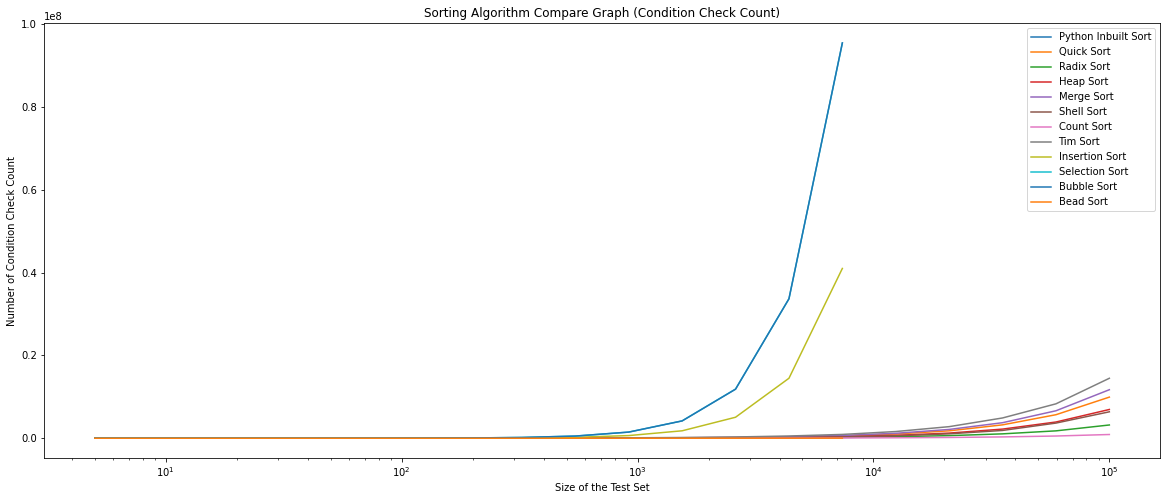

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(TestSize,CombinedData.loc['Python Sort'].loc['Condition Check Count'],label="Python Inbuilt Sort")
plt.plot(TestSize,CombinedData.loc['Quick Sort'].loc['Condition Check Count'],label="Quick Sort")
plt.plot(TestSize,CombinedData.loc['Radix Sort'].loc['Condition Check Count'],label="Radix Sort")
plt.plot(TestSize,CombinedData.loc['Heap Sort'].loc['Condition Check Count'],label="Heap Sort")
plt.plot(TestSize,CombinedData.loc['Merge Sort'].loc['Condition Check Count'],label="Merge Sort")
plt.plot(TestSize,CombinedData.loc['Shell Sort'].loc['Condition Check Count'],label="Shell Sort")
plt.plot(TestSize,CombinedData.loc['Count Sort'].loc['Condition Check Count'],label="Count Sort")
plt.plot(TestSize,CombinedData.loc['Tim Sort'].loc['Condition Check Count'],label="Tim Sort")
plt.plot(TestSize,CombinedData.loc['Insertion Sort'].loc['Condition Check Count'],label="Insertion Sort")
plt.plot(TestSize,CombinedData.loc['Selection Sort'].loc['Condition Check Count'],label="Selection Sort")
plt.plot(TestSize,CombinedData.loc['Bubble Sort'].loc['Condition Check Count'],label="Bubble Sort")
plt.plot(TestSize,CombinedData.loc['Bead Sort'].loc['Condition Check Count'],label="Bead Sort")
plt.ylabel('Number of Condition Check Count')
plt.xlabel('Size of the Test Set')
plt.xscale("log")
plt.title('Sorting Algorithm Compare Graph (Condition Check Count)')
plt.legend()
plt.show()

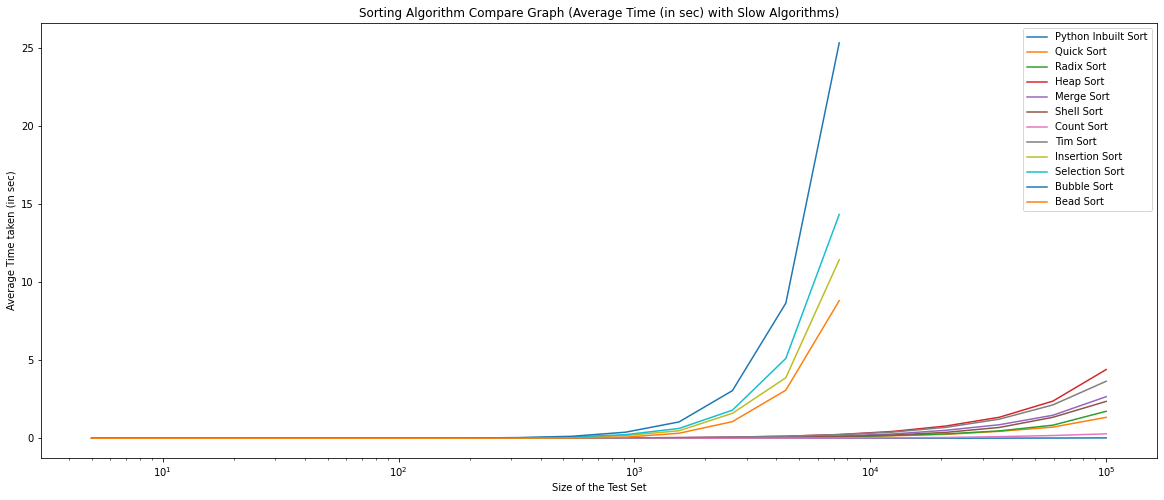

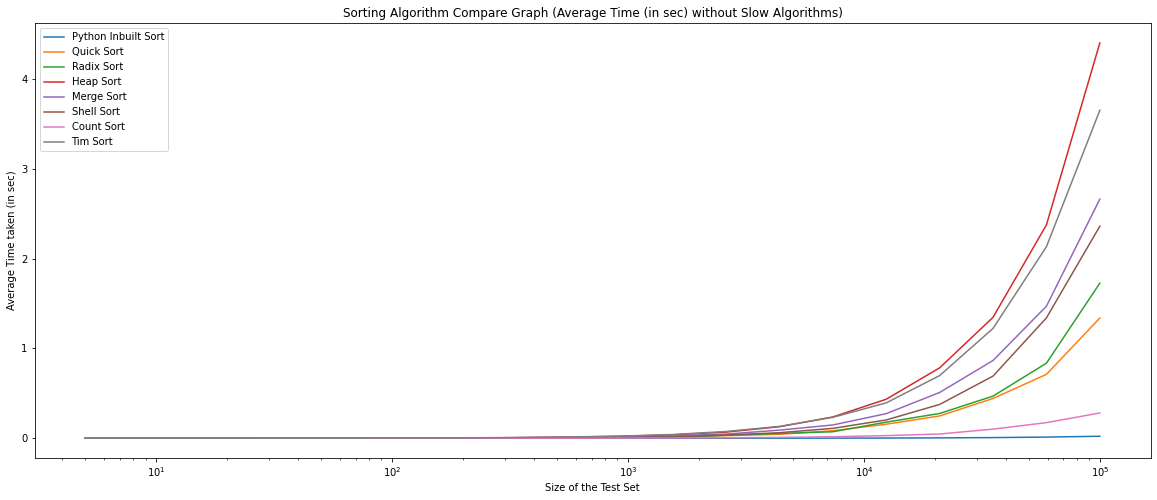

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(TestSize,CombinedData.loc['Python Sort'].loc['Average Time (in sec)'],label="Python Inbuilt Sort")
plt.plot(TestSize,CombinedData.loc['Quick Sort'].loc['Average Time (in sec)'],label="Quick Sort")
plt.plot(TestSize,CombinedData.loc['Radix Sort'].loc['Average Time (in sec)'],label="Radix Sort")
plt.plot(TestSize,CombinedData.loc['Heap Sort'].loc['Average Time (in sec)'],label="Heap Sort")
plt.plot(TestSize,CombinedData.loc['Merge Sort'].loc['Average Time (in sec)'],label="Merge Sort")
plt.plot(TestSize,CombinedData.loc['Shell Sort'].loc['Average Time (in sec)'],label="Shell Sort")
plt.plot(TestSize,CombinedData.loc['Count Sort'].loc['Average Time (in sec)'],label="Count Sort")
plt.plot(TestSize,CombinedData.loc['Tim Sort'].loc['Average Time (in sec)'],label="Tim Sort")
plt.plot(TestSize,CombinedData.loc['Insertion Sort'].loc['Average Time (in sec)'],label="Insertion Sort")
plt.plot(TestSize,CombinedData.loc['Selection Sort'].loc['Average Time (in sec)'],label="Selection Sort")
plt.plot(TestSize,CombinedData.loc['Bubble Sort'].loc['Average Time (in sec)'],label="Bubble Sort")
plt.plot(TestSize,CombinedData.loc['Bead Sort'].loc['Average Time (in sec)'],label="Bead Sort")
plt.ylabel('Average Time taken (in sec)')
plt.xlabel('Size of the Test Set')
plt.xscale("log")
plt.title('Sorting Algorithm Compare Graph (Average Time (in sec) with Slow Algorithms)')
plt.legend()
plt.show()
print()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(TestSize,CombinedData.loc['Python Sort'].loc['Average Time (in sec)'],label="Python Inbuilt Sort")
plt.plot(TestSize,CombinedData.loc['Quick Sort'].loc['Average Time (in sec)'],label="Quick Sort")
plt.plot(TestSize,CombinedData.loc['Radix Sort'].loc['Average Time (in sec)'],label="Radix Sort")
plt.plot(TestSize,CombinedData.loc['Heap Sort'].loc['Average Time (in sec)'],label="Heap Sort")
plt.plot(TestSize,CombinedData.loc['Merge Sort'].loc['Average Time (in sec)'],label="Merge Sort")
plt.plot(TestSize,CombinedData.loc['Shell Sort'].loc['Average Time (in sec)'],label="Shell Sort")
plt.plot(TestSize,CombinedData.loc['Count Sort'].loc['Average Time (in sec)'],label="Count Sort")
plt.plot(TestSize,CombinedData.loc['Tim Sort'].loc['Average Time (in sec)'],label="Tim Sort")
plt.ylabel('Average Time taken (in sec)')
plt.xlabel('Size of the Test Set')
plt.xscale("log")
plt.title('Sorting Algorithm Compare Graph (Average Time (in sec) without Slow Algorithms)')
plt.legend()
plt.show()
print()